#### EDA and fillna with ROLLING MEAN and BACKFILL


In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal     import seasonal_decompose, STL
from statsmodels.tsa.stattools import adfuller

from datetime import datetime,timedelta
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.graphics.gofplots     import qqplot
from statsmodels.tsa.arima_model       import  ARMA, ARIMA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf

C:\Users\csnaik\anaconda3\envs\tf_rani\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
 df = pd.read_excel('Price_BeetRoot_ClusterBeans.xlsx',parse_dates =["Date"], index_col ='Date')
df.head(2)

,Arrivals(Qtls),Maximum,Minimum,Model,Purchase by
Date,,,,,
2017-01-01,7,800.0,800,800,Private Traders
2017-01-02,2,800.0,800,800,Private Traders


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 583 entries, 2017-01-01 to 2019-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Arrivals(Qtls)  583 non-null    int64  
 1   Maximum         582 non-null    float64
 2   Minimum         583 non-null    int64  
 3   Model           583 non-null    int64  
 4   Purchase by     583 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 27.3+ KB


In [5]:
df.isnull().sum()

Arrivals(Qtls)    0
Maximum           1
Minimum           0
Model             0
Purchase by       0
dtype: int64

In [6]:
df.describe()

,Arrivals(Qtls),Maximum,Minimum,Model
count,583.000000,582.000000,583.000000,583.000000
mean,4.962264,1677.955326,1636.620926,1787.205832
std,3.215932,810.050961,776.214981,3338.314442
min,1.000000,300.000000,200.000000,200.000000
25%,3.000000,1000.000000,1000.000000,1000.000000
50%,5.000000,1600.000000,1600.000000,1600.000000
75%,6.000000,2000.000000,2000.000000,2000.000000
max,20.000000,6020.000000,4200.000000,80021.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

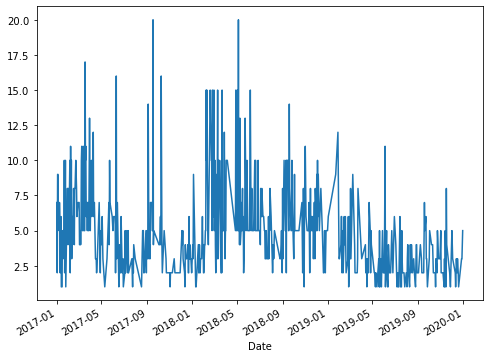

In [8]:
df['Arrivals(Qtls)'].plot(figsize=(8,6))
plt.show()

In [9]:
dt = pd.date_range(start ='01-01-2017', end ='30-12-2019', freq ='D' )
dt

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24',
               '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-28',
               '2019-12-29', '2019-12-30'],
              dtype='datetime64[ns]', length=1094, freq='D')

In [10]:
df1 = pd.DataFrame(columns=['Arrivals(Qtls)'],data=df, index = dt)
df1.head(10)

,Arrivals(Qtls)
2017-01-01,7.0
2017-01-02,2.0
2017-01-03,9.0
2017-01-04,9.0
2017-01-05,6.0
2017-01-06,6.0
2017-01-07,5.0
2017-01-08,7.0
2017-01-09,6.0
2017-01-10,2.0


In [11]:
df1.isnull().sum()

Arrivals(Qtls)    511
dtype: int64

In [12]:
df1 = df1.fillna(df1.rolling(22,min_periods=1).mean())

In [13]:
df1.isnull().sum()

Arrivals(Qtls)    0
dtype: int64

#### the null values are filled after 22 datapoints

In [14]:
df1.value_counts()

Arrivals(Qtls)
5.000000          123
2.000000          121
3.000000          100
4.000000           70
6.000000           58
                 ... 
5.733333            1
5.722222            1
3.384615            1
5.705882            1
5.200000            1
Length: 220, dtype: int64

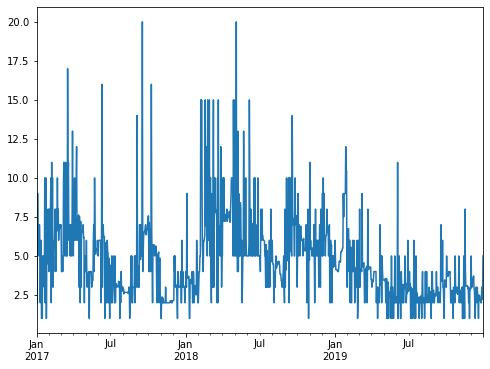

In [15]:
df1['Arrivals(Qtls)'].plot(figsize=(8,6))
plt.show()

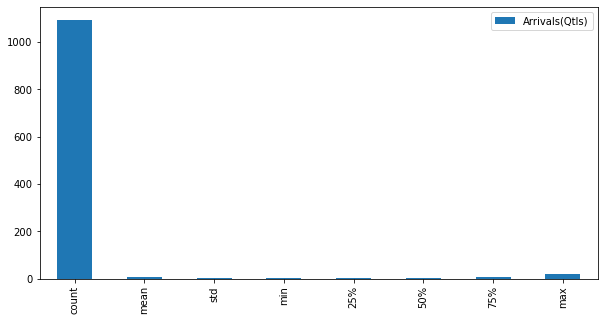

In [16]:
df1.describe().plot.bar(figsize=(10,5))
plt.show()

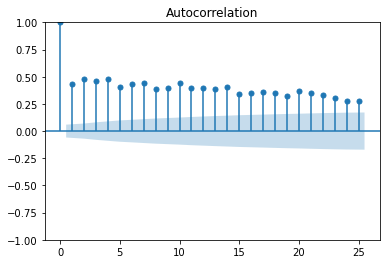

In [17]:
plot_acf(df1, lags =25)
plt.show()

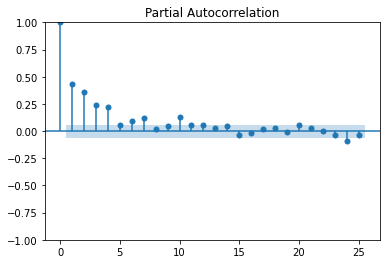

In [18]:
plot_pacf(df1,lags =25)
plt.show()

#### The plot for 200 datapoints ...~ 7 months

<Figure size 576x288 with 0 Axes>

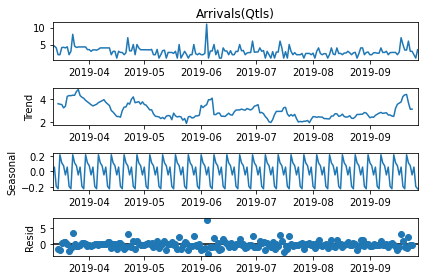

In [19]:
plt.figure(figsize=(8,4))
results = seasonal_decompose(df1['Arrivals(Qtls)'].iloc[800:1000])
results.plot();

#### DICKEY FULLER TEST for STATIONARITY

In [20]:
observations= df1.values
test_result = adfuller(observations)

In [21]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -3.361879
p-value: 0.012329
Critical Values:
	1%: -3.43641
	5%: -2.86421
	10%: -2.56819


##### USING AUTO TIMESERIES for selection of best model

In [22]:
#! pip install auto-ts

In [23]:
from auto_ts import auto_timeseries

Importing plotly failed. Interactive plots will not work.


Imported auto_timeseries version:0.0.64. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [24]:
df.head(2)

,Arrivals(Qtls),Maximum,Minimum,Model,Purchase by
Date,,,,,
2017-01-01,7,800.0,800,800,Private Traders
2017-01-02,2,800.0,800,800,Private Traders


In [25]:
df.tail(2)

,Arrivals(Qtls),Maximum,Minimum,Model,Purchase by
Date,,,,,
2019-12-28,3,2000.0,1800,1900,Private Traders
2019-12-30,5,3000.0,3000,3000,Private Traders


### Split the time series data into training and testing sets

In [26]:
train_end = datetime(2018,12,30)
test_end = datetime(2019,12,30)

In [27]:
train = df1[:train_end]
test = df1[train_end + timedelta(days =1): test_end]

In [28]:
train.shape,test.shape

((729, 1), (365, 1))

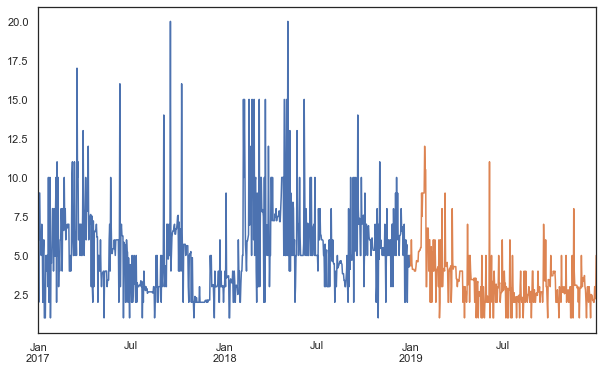

In [29]:
train['Arrivals(Qtls)'].plot(figsize=(10,6))
test['Arrivals(Qtls)'].plot(figsize=(10,6))
plt.show()

In [30]:
model = auto_timeseries(forecast_period =365,score_type='rmse',time_interval='D', non_seasonal_pdq=None, seasonality=False,
         model_type=['best'])

In [31]:
#### reshape train and test for model input

In [32]:
train.reset_index(inplace=True)
test.reset_index(inplace= True)

In [33]:
train.head(), test.head()

(       index  Arrivals(Qtls)
 0 2017-01-01             7.0
 1 2017-01-02             2.0
 2 2017-01-03             9.0
 3 2017-01-04             9.0
 4 2017-01-05             6.0,
        index  Arrivals(Qtls)
 0 2018-12-31        5.000000
 1 2019-01-01        4.333333
 2 2019-01-02        6.000000
 3 2019-01-03        4.500000
 4 2019-01-04        4.111111)

Start of Fit.....
    Target variable given as = Arrivals(Qtls)
Start of loading of data.....
    Inputs: ts_column = index, sep = ,, target = ['Arrivals(Qtls)']
    Using given input: pandas dataframe...
    index column exists in given train data...
    train data shape = (729, 1)
Alert: Could not detect strf_time_format of index. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Lowering forecast period to 121 to enable cross_validation
Max. iterations usi

 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2817.637, Time=0.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2821.009, Time=1.60 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2813.372, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2814.953, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2814.690, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2814.814, Time=0.89 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=2814.838, Time=0.75 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2815.434, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=2815.699, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2815.664, Time=0.17 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=2819.072, Time=1.14 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0]          
Total fit time: 10.975 seconds

SARIMAX RMSE (all folds): 3.6980
SARIMAX Norm RMSE (all folds): 131%


-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    

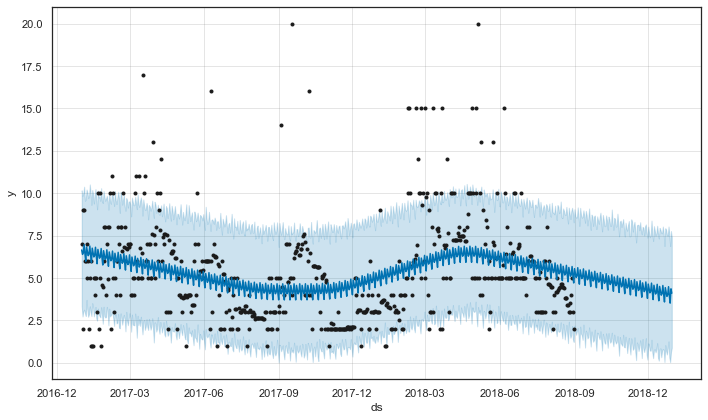

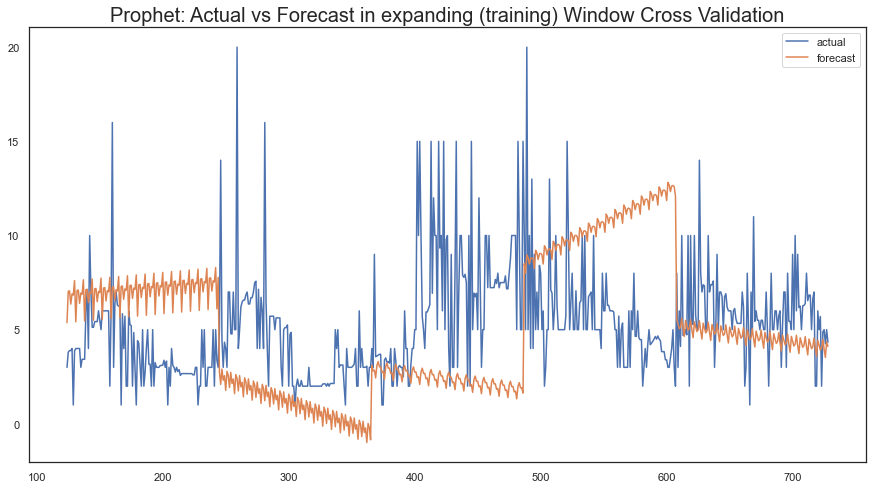

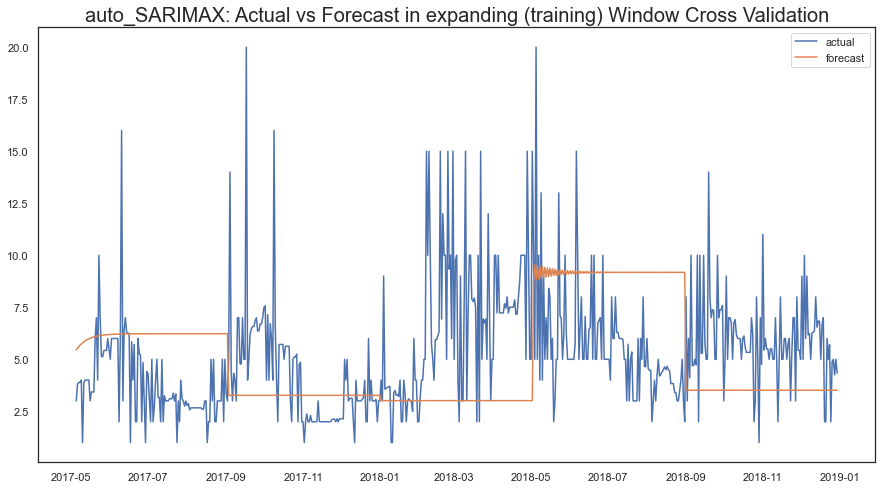

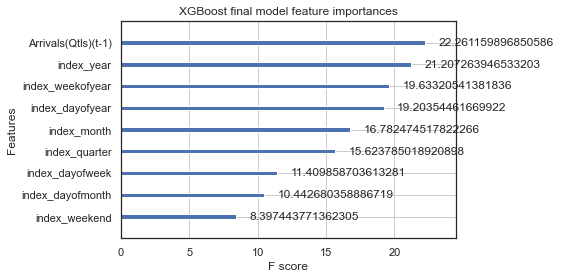

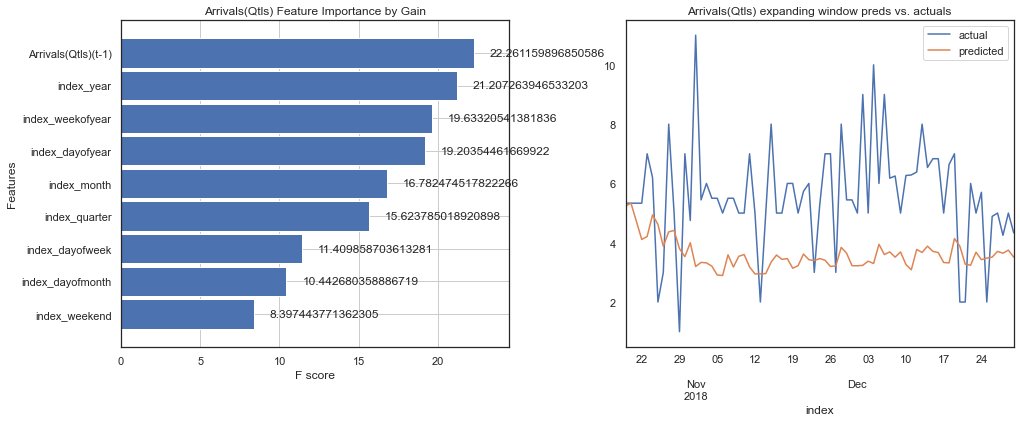

In [35]:
model.fit(traindata = train, ts_column ='index', target ='Arrivals(Qtls)')

In [36]:
future_pred = model.predict(testdata = test, model = 'best')

Predicting using test dataframe shape = (365, 2) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for index. Provide strf_time format during "setup" for better results.
ML predictions completed


In [37]:
future_pred.values

array([[3.14149857,        nan,        nan,        nan],
       [3.27654862,        nan,        nan,        nan],
       [3.51442838,        nan,        nan,        nan],
       ...,
       [3.31207561,        nan,        nan,        nan],
       [3.23289776,        nan,        nan,        nan],
       [3.16994715,        nan,        nan,        nan]])

In [38]:
future_pred.head(2)

,Arrivals(Qtls),mean_se,mean_ci_lower,mean_ci_upper
index,,,,
2018-12-31,3.141499,NaN,NaN,NaN
2019-01-01,3.276549,NaN,NaN,NaN


In [39]:
test['ypred']=future_pred['Arrivals(Qtls)'].values

In [40]:
test.head(10)

,index,Arrivals(Qtls),ypred
0,2018-12-31,5.000000,3.141499
1,2019-01-01,4.333333,3.276549
2,2019-01-02,6.000000,3.514428
3,2019-01-03,4.500000,4.430110
4,2019-01-04,4.111111,4.517567
5,2019-01-05,4.111111,4.418027
6,2019-01-06,4.111111,3.602107
7,2019-01-07,4.111111,3.281844
8,2019-01-08,4.000000,3.251866
9,2019-01-09,4.000000,3.153696


https://www.youtube.com/watch?v=YVQzFCPkgt4

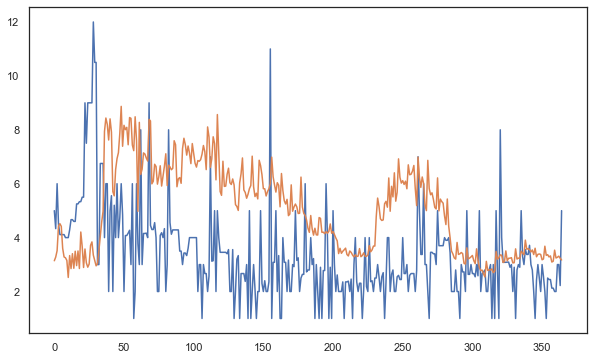

In [43]:
test['Arrivals(Qtls)'].plot(figsize=(10,6))
test['ypred'].plot(figsize=(10,6))
plt.show()

In [44]:
train.set_index('index', inplace = True)
train.head(2)

,Arrivals(Qtls)
index,
2017-01-01,7.0
2017-01-02,2.0


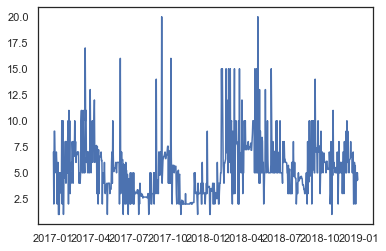

In [45]:
plt.plot(train['Arrivals(Qtls)'], label='Train')
plt.show()

In [46]:
test.set_index('index', inplace = True)
test.head(2)

,Arrivals(Qtls),ypred
index,,
2018-12-31,5.000000,3.141499
2019-01-01,4.333333,3.276549


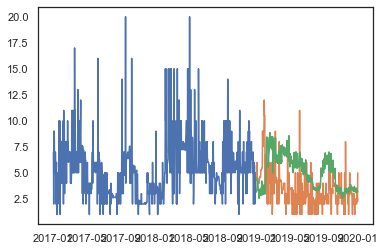

In [50]:
plt.plot(train['Arrivals(Qtls)'], label='Train')
plt.plot(test['Arrivals(Qtls)'], label='Test')
plt.plot(test['ypred'], label='Prediction')
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Arrivals(Qtls)'],test['ypred']))
print("ROOT MEAN SQAURED ERROR (RMSE) :",rmse)

ROOT MEAN SQAURED ERROR (RMSE) : 2.785564961049483
